#      Vaccine Usage Prediction

# Abstract:
Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine omics data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.


# Problem Statement:
 Predict how likely it is that the people will take an H1N1 flu vaccine using deccision tree Regression.



In [2]:
# import the requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data

In [3]:
# read dataset
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [4]:
#  first five data in the dataset
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
#  last five data in the dataset
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [6]:
df.shape

(26707, 34)

In [7]:
df.size

908038

In [8]:
# conclude- We can see that the dataset has 26707 observations and 34 features, and one of those features is the target variable.

In [9]:
# get the infomarmatiom of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:
# conclude-We can observe that the dataset has a combination of categorical (object)-9 and numeric (float and int)-34 features

In [11]:
# Summary statistics of Numerical features.
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [12]:
#conclude - We can see for each numeric feature, the count , the mean value, standard deviation,
#           minimum value, maximum value and the 25% percentile, the 50% percentile or median, the 75% percentile.

In [13]:
# We can plot a seaborn histogram displaying the frequency of both categories of the target variable.

(array([21033.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5674.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

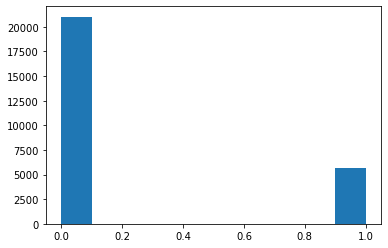

In [14]:
import seaborn as sns
plt.hist(x='h1n1_vaccine',data=df)

In [15]:
df.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [16]:
# conclude-We can see that category received the h1n1 vaccine(no:0) frequency 21033 and received the h1n1 vaccine(yes:1) category  frequency 5674.

In [17]:
df.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


<AxesSubplot:>

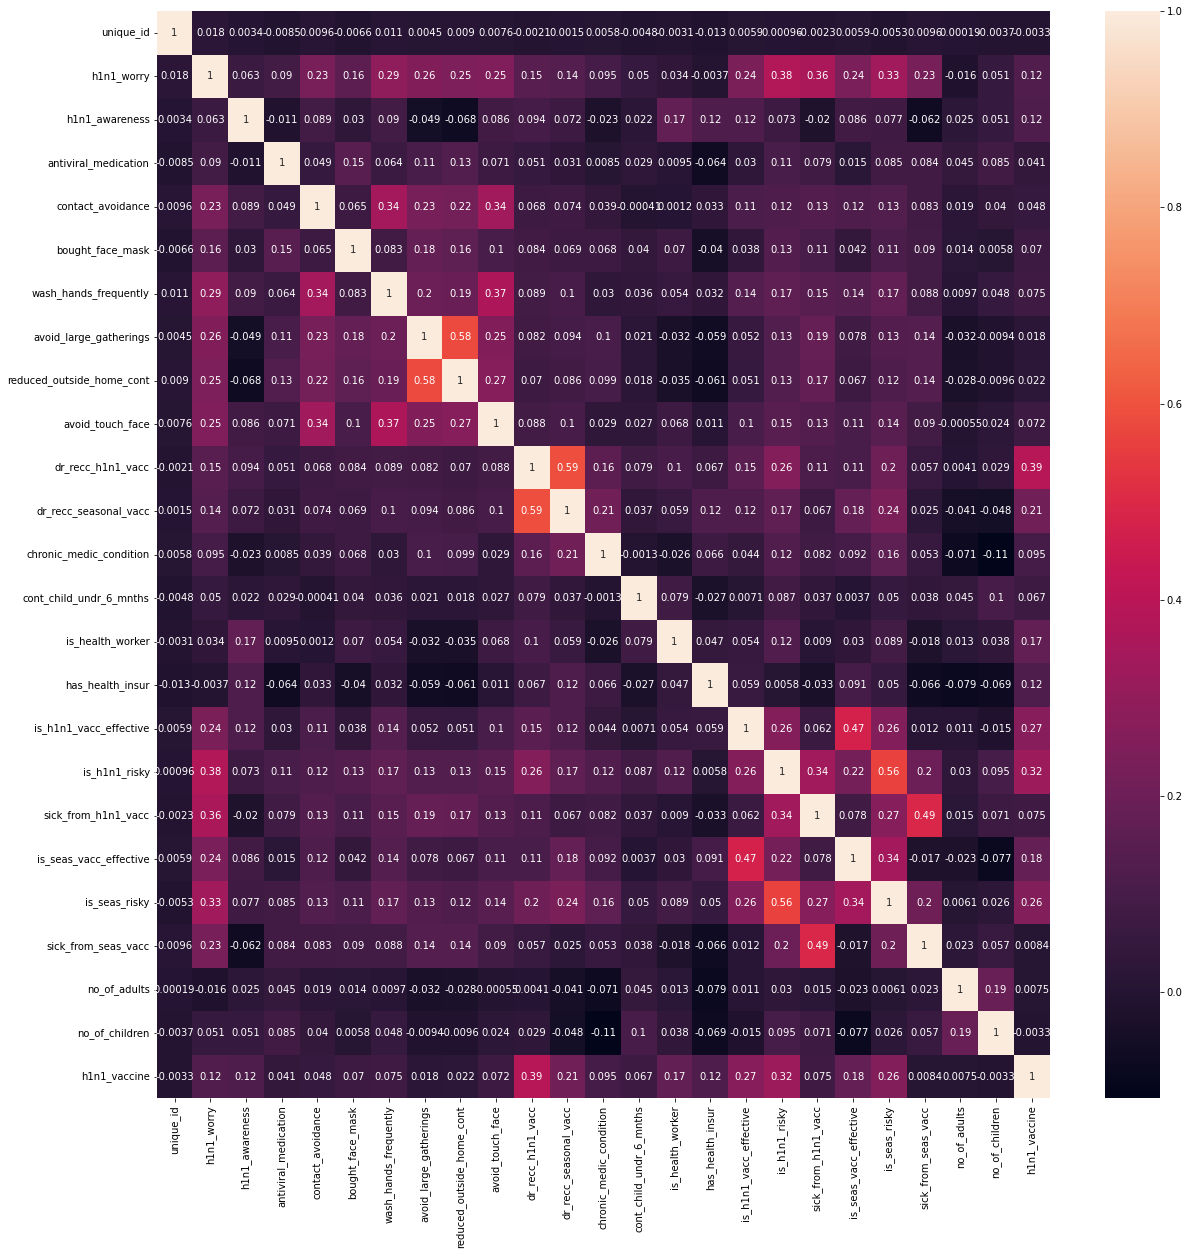

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

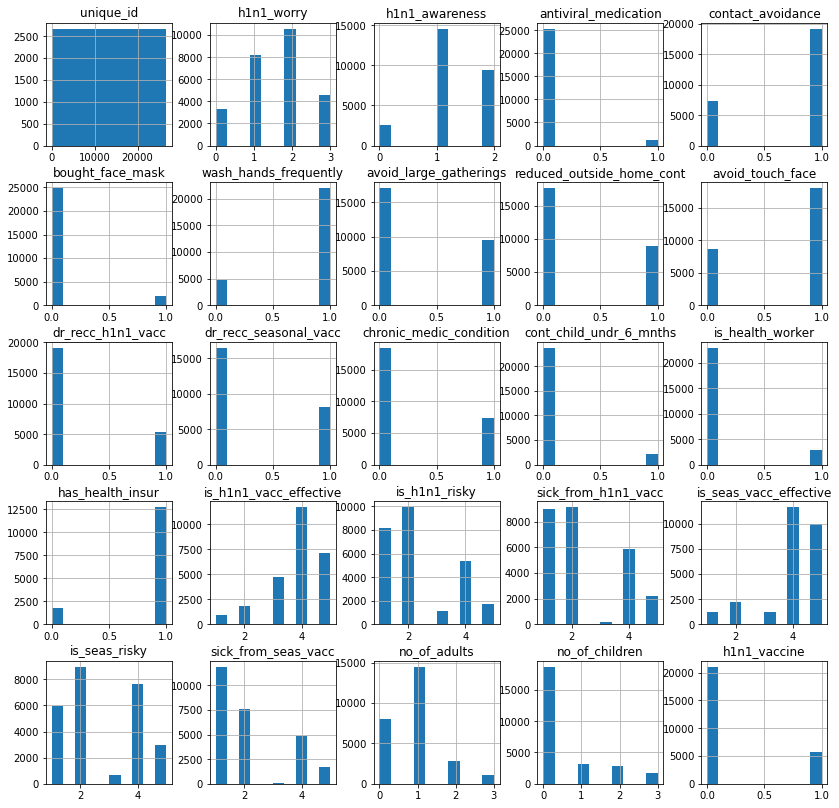

In [19]:
# histogram
df.hist(figsize=(14,14))
plt.show()

In [20]:
# pairplot
#sns.pairplot(df,data=df)

# Check for significant missing values

In [21]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [22]:
# in dataset missing values found 

In [23]:
# handling missing values with help of following method
# handling of missing value
#Dropping the missing values
#Replacing with previous value - Forward fill
#Replacing with next value - Backward fill
#Replacing with mean
#Replacing with Median:
#Replacing with Mode:
# Drop this unnamed column as it has significant missing values and also drop the id column

In [24]:
df.h1n1_worry= df.h1n1_worry.fillna(0)
df.h1n1_awareness=df.h1n1_awareness.fillna(df.h1n1_awareness.median())
df.antiviral_medication= df.antiviral_medication.fillna(0)
df.contact_avoidance= df.contact_avoidance.fillna(1.0)
df.bought_face_mask= df.bought_face_mask.fillna(0)
df.wash_hands_frequently= df.wash_hands_frequently.fillna(1.0)
df.avoid_large_gatherings= df.avoid_large_gatherings.fillna(0)
df.reduced_outside_home_cont= df.reduced_outside_home_cont.fillna(0)
df.avoid_touch_face= df.avoid_touch_face.fillna(1.0)
df.dr_recc_h1n1_vacc= df.dr_recc_h1n1_vacc.fillna(0)
df.dr_recc_seasonal_vacc= df.dr_recc_seasonal_vacc.fillna(0)
df.chronic_medic_condition= df.chronic_medic_condition.fillna(0)
df.cont_child_undr_6_mnths= df.cont_child_undr_6_mnths.fillna(0)

In [25]:
df.is_health_workers= df.is_health_worker.fillna(0)
df.has_health_insur= df.has_health_insur.fillna(0)
df.is_h1n1_vacc_effective= df.is_h1n1_vacc_effective.fillna(3.0)
df.is_h1n1_risky= df.is_h1n1_risky.fillna(3.0)
df.sick_from_h1n1_vacc= df.sick_from_h1n1_vacc.fillna(3.0)
df.is_seas_vacc_effective= df.is_seas_vacc_effective.fillna(3.0)
df.income_level= df.income_level.fillna('Other')
df.marital_status= df.marital_status.fillna('Other')
df.is_health_worker= df.is_health_worker.fillna(0)
df.is_seas_risky = df.is_seas_risky.fillna(3.0)
df.sick_from_seas_vacc= df.sick_from_seas_vacc.fillna(3.0)
df.qualification= df.qualification.fillna('Other')
df.housing_status = df.qualification.fillna('Other')
df.employment= df.employment.fillna('Other')
df.no_of_adults= df.no_of_adults.fillna(1.0)
df.no_of_children =df.no_of_children.fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2748\909101944.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.is_health_workers= df.is_health_worker.fillna(0)


In [26]:
# after missing value handling recheck 

In [27]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [28]:
# after handling missing value no found missming values

# checking the outliers

<AxesSubplot:xlabel='avoid_touch_face'>

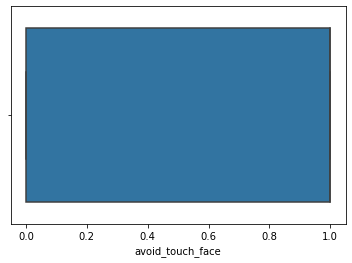

In [37]:
sns.boxplot(x="avoid_touch_face", data=df)

In [38]:
# after checking the outliers not fount outlier

In [39]:
# handling the categarical values

In [40]:
# convert the categorrical value into numerical

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)


In [42]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,1,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,0,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,2,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,0,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,4,0,0,1.0,0.0,0


In [43]:
# drop the not isefull columns

In [45]:
df=df.drop("unique_id",axis=1)

In [46]:
df.head(1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,1,1,2,0.0,0.0,0


# Now data is ready for the learn algorithms

In [48]:
# decision tree Algorithms

In [49]:
# import the requrired library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
# selecting the in your data independent(x) and dependent(y) variable

In [51]:
x = df.drop('h1n1_vaccine',axis=1)
y= df[['h1n1_vaccine']]

In [52]:
# standerdisation of data
# To bring the data into one magnitude  we are going to standardization
# two type of standardiseation - 1] min max scalar 2]standardization


In [55]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

scaled=scalar.fit_transform(x)

In [54]:
# convert the data in train and test 
# three types of sampling 1]simple random sampling 2] statified sampling and cluster sampling

In [100]:
# split the data train and test 
x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=50)

In [56]:
# simple randome sampling is used data is balanced 
# to check the data is balanced or not 
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt=DecisionTreeClassifier(class_weight='balanced',criterion='entropy', max_depth=5,random_state=42)

In [110]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=42)

In [111]:
# prediction on your test data
y_test_pred=dt.predict(x_test)
# prediction on train data
y_train_pred=dt.predict(x_train)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test,y_test_pred))

<IPython.core.display.Javascript object>

Accuracy: 0.7804193186072632


In [113]:
print("Accuracy:",metrics.accuracy_score(y_train,y_train_pred))

<IPython.core.display.Javascript object>

Accuracy: 0.8003744441844137


In [114]:
from sklearn.metrics import confusion_matrix 
cnf_metrics=confusion_matrix(y_test,y_test_pred)
cnf_metrics

array([[3346,  863],
       [ 310,  823]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

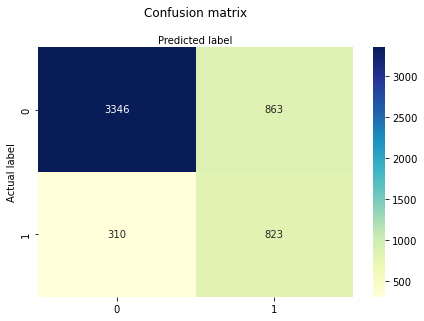

In [115]:
import seaborn as sns
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
from sklearn import metrics
result=metrics.classification_report(y_test,y_test_pred)
print(result)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4209
           1       0.49      0.73      0.58      1133

    accuracy                           0.78      5342
   macro avg       0.70      0.76      0.72      5342
weighted avg       0.82      0.78      0.79      5342

